# Machine Learning
##### "Donner à une machine la capacité d'apprendre sans la programmer de façon explicite." Arthur Samuel
#### C'est dévolopper un modèle mathématique à partir des données expérimentales.
### *En ML il ne faut jamais évaluer la performance d'un modèle sur les mêmes données qui ont servi pour l'entraîner (modèle)*. Pour cela, l'entrainement (X_train, y_train) prend 80% de données et les 20% restants vont à l'évaluation (X_test, y_test).

# - **Apprentissage Supervisé**
#### La machine réçoit des données caractérisées par des variables x (features) et annotées d'une variable y (label/target). Le but est de prédire y (la cible) en fonction de x (données reçues).
##### En fournissant ces données à la machine, on constitue un Dataset(ensemble de données).
##### Ensuite on spécifie le type de modèle (linéaire, polynomiale, arbre de décision, réseau de neuronnes) en précisant les hyperparamètres du modèle choisit. Grâce à un algo d'optimisation, la machine trouve les paramètres qui fourniessent les meilleures performances de sur le Dataset. => Phase d'entrainement.
##### Une fois cette étape finie, le modèle de ML est prêt à l'utilisation.

# Etapes ou Processus avec Scikit-Learn
#### 1. Définir le modèle ou sélectionner un estimateur et préciser ces hyperparamètres => model = LinearRegression("hyperparams")
#### 2. Entraîner le modèle sur les données x et y (divisées en 2 tableaux Numpy) => model.fit(x, y)
#### 3. Evaluer le modèle => model.score(x, y). *La machine utilise les données x pour faire des prédictions et les comparer aux données y présentes dans la méthode*
#### 4. Utiliser le modèle pour  prédire => model.predict(x)

# 1. Régression Linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fixer les valeurs
np.random.seed(0)
# Créer 100 examples
m = 100

# Création de deux tableaux à deux dimension
# 100 éléments entre 0 et 10
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

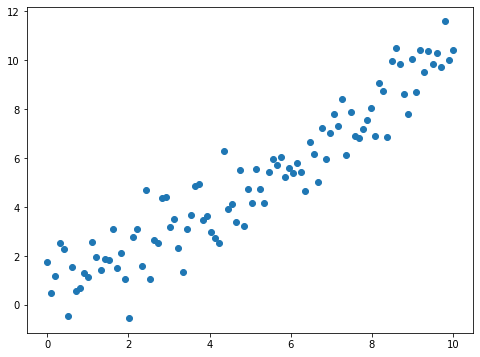

In [3]:
# Visualiser les données
plt.figure(figsize=(8, 6))
# X en fonction de y
plt.scatter(X, y)
plt.show()

In [4]:
# Développer un modèle de régression linéaire
from sklearn.linear_model import LinearRegression

In [5]:
# Création de l'objet de la classe LinearRegression
model = LinearRegression() # LReg implémente la méthode des moindres carrés qui n'utilise pas d'hyperparams
# Entrainement le modèle sur les donnés X et y
model.fit(X, y)
# Evaluetion du modèle sur les mêmes données X et y
model.score(X, y) # Ici c'est le coéfficient de détermination (R² de la méthode des moindres carrés) qui est calculé

0.8881140743377214

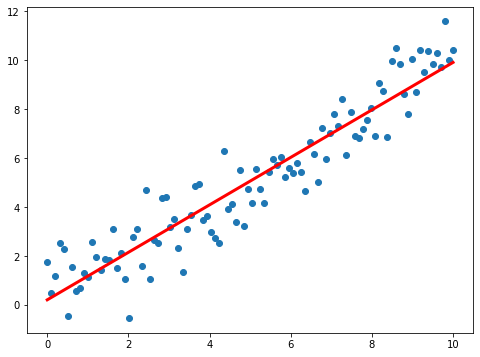

In [6]:
# Faire des prédictions sur le modèle en fonction des données de X
predictions = model.predict(X)

# Observation de ces prédictions avec plt
plt.figure(figsize=(8, 6))
# Afficher les données avant la prédiction
plt.scatter(X, y)
# Afficher les prédictions
plt.plot(X, predictions, c="r", lw=3)
plt.show()

## Survivants du naufrage de titanic
##### Savoir si une personne untelle en fonction de son âge, son sex et de la classe dans laquelle elle voyageait pouvait ou ne pas survivre à ce naufrage

# Problème de Classification

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
# Charger le Dataset
titanic = sns.load_dataset("titanic")
# Afficher la taille du Dataset
titanic.shape
# Afficher les 1ères données
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# Filtrer le Dataset en sélectionant uniquement que les colonnes sur lesquelles nous allons travailler
titanic = titanic[["survived", "pclass", "sex", "age"]]
# Supprimer les données manquantes
titanic.dropna(axis=0, inplace=True)
# Remplacer les valeurs de sex par 0 et 1 désignant male et female pour n'avoir que des données numériques
titanic["sex"].replace(["male", "female"], [0, 1], inplace=True)

# Afficher la tête du Dataset
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [10]:
# importer le modèle de classification
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Définir le modèle (initilialisation de l'instance model de la classe KNeighborsClassifier())
model = KNeighborsClassifier()

# Données de prédiction : diviser la dataset en deux parties
X = titanic.drop("survived", axis=1) # Toutes les colonnes sauf celle de "survived"
y = titanic["survived"]

In [12]:
# Entraîner le modèle sur les données X et y
model.fit(X, y)
# Evaluer la performance du modèle créé
model.score(X, y)

0.8417366946778712

In [13]:
# Fonction de prédiction
def survivre(modele, pclass=2, sex=0, age=25):
    
    # Tableau Numpy à deux dimensions contenant tous ces éléments dans le bon ordre
    x = np.array([pclass, sex, age]).reshape(1, 3)
    # Afficher les résultats de la prédiction sur x
    print(modele.predict(x))
    # Afficher le taux d'appartenance à cette classe (vie ou mort)
    print(modele.predict_proba(x))

In [14]:
# survivre au naufrage => [1]
# mort au naufrage => [0]
survivre(model)

[0]
[[1. 0.]]


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Meilleur score :  1


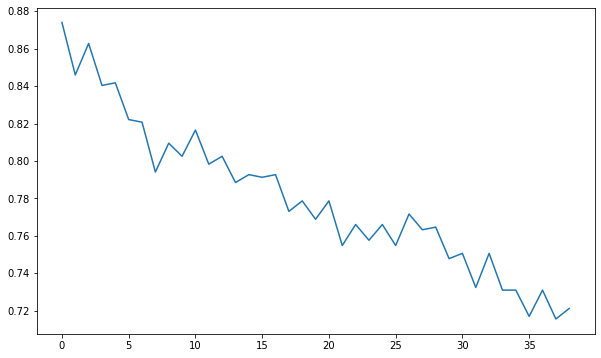

In [15]:
# Liste de score
score = []
# Nbre de meilleurs voisins
best_neighbors = 1
# Meilleur score
best_score = 0

for k in range(best_neighbors, 40):
    
    # Définir le modèle avec le nbre de plus proches voisins
    model = KNeighborsClassifier(n_neighbors=k)
    # Entrainer le modèle
    model.fit(X, y)
    # Ajouter les données d'évaluation dans le dict
    score.append(model.score(X, y))
    
    # Vérification
    if best_score < model.score(X, y):
        # Le meilleur voisin prend celui-ci
        best_neighbors = k
        best_score = model.score(X, y)

print("Meilleur score : ", best_neighbors)
plt.figure(figsize=(10, 6))
plt.plot(score)
plt.show()

In [16]:
# Le Dataset des fleurs d'iris
from sklearn.datasets import load_iris

In [17]:
# Instance de la classe load_iris()
iris = load_iris()

# Les données (label)
X = iris.data
# Les cibles (feature/target)
y = iris.target

# Afficher la taille des données
print(X.shape)

(150, 4)


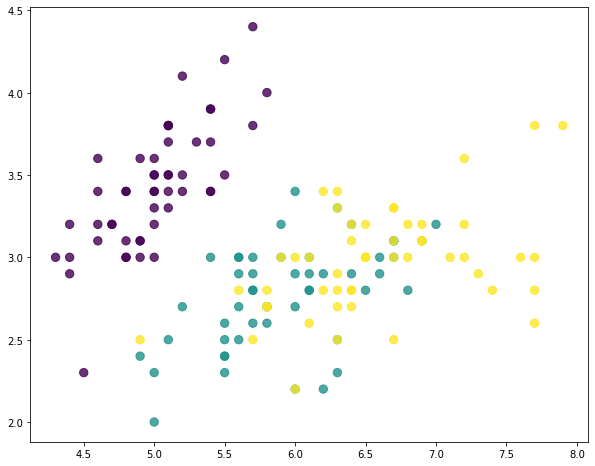

In [18]:
plt.figure(figsize=(10, 8))
# Visualiser les deux premières données en fonction de leur cible
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.8)
plt.show()

In [19]:
# Diviser le Dataset
from sklearn.model_selection import train_test_split

In [20]:
# Découpage en données de train et de set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# test_size: le pourcentage des données de test
# train_size: le pourcentage des données de train

print("Train set :", X_train.shape)
print("Test set :", X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


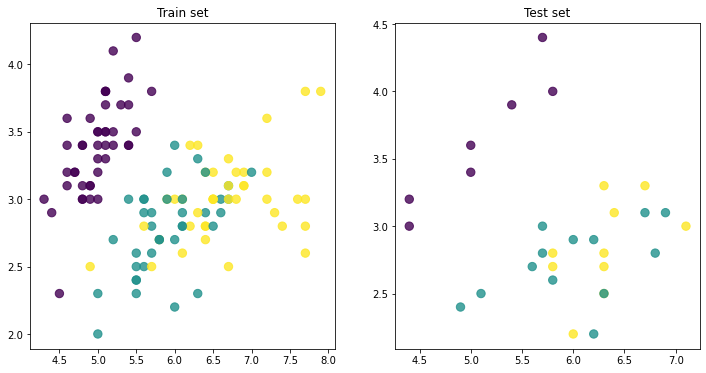

In [21]:
# Visualisation des données d'entrainement et d'évaluation
plt.figure(figsize=(12, 6))
# 1ère sous-figure
plt.subplot(121)
# Les données d'entrainement en fonction de leur cible et contrôler l'aléatoire avec random_state
plt.scatter(X_train[:, 0], X_train[:, 1], s=70, c=y_train, alpha=0.8)
plt.title("Train set")
# 2ème sous-figure
plt.subplot(122)
# Les données d'évaluation en fonctio de leur cible
plt.scatter(X_test[:, 0], X_test[:, 1], s=70, c=y_test, alpha=0.8)
plt.title("Test set")
plt.show()

In [22]:
# Entraîner le modèle de ML
# Modèle de classification du plus proche voisin
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Définir un modèle avec le nombre de voisins
model = KNeighborsClassifier(n_neighbors=7)

# Entraîner le modèle
model.fit(X_train, y_train)
# On peut observer le comportement si jamais on évalue ce modèle sur les mêmes données d'entraînement
print("Train Score :", model.score(X_train, y_train))

Train Score : 0.9666666666666667


In [24]:
# D'après les résultats ci-dessus, on peut observer un très bon pourcentage
# Mais qui ne sera pas le cas avec les données d'évaluation
# Autrement, cela singifie que notre modèle ne réussira pas à prédire 97% dans le futur
print("Test Score :", model.score(X_test, y_test))

Test Score : 0.9666666666666667


## Validation Set
#### Amélioration du modèle

### Cross-Validation
##### Cette technique consiste à entrainer puis valider le modèle sur plusieurs découpes possibles du Train Set

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# Faire passer le modèle préalablement défini, les données d'entrainement, le nbre de validation(cv)
# On peut aussi indiquer le type de métrique à utiliser, ici 'accuracy'
cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9416666666666668

In [27]:
# Enregistrer chaque score dans une liste
val_score = [] # Liste vide
for k in range(1, 50):
    
    # Prendre la moyenne chaque score dont le nbre de plus proches voisins va de 1 à 50
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    # Ajouter chaque score dans la liste
    val_score.append(score)

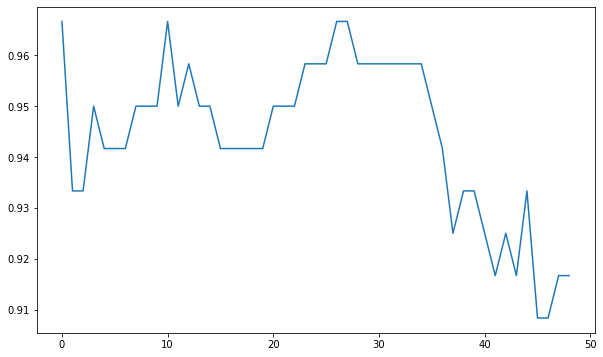

In [28]:
# Visualiser dans un graphique la liste des tous les scores
plt.figure(figsize=(10, 6))
plt.plot(val_score)
plt.show()

In [29]:
from sklearn.model_selection import validation_curve

In [30]:
# Pas besoin de procéder comme ci-dessus pour avoir la valeur moyenne de validation (découpe)
# En effet, sklearn a une fonction "validation_curve()" avec laquelle on a le même résultat

# Rédéfinir le modèle, cette fois-ci sans préciser explicitement le nbre de plus proches voisins
model = KNeighborsClassifier()
# Le nbre de voisins comme tableau Numpy de 49 éléments
k = np.arange(1, 50)

# On définit le train et validation scores avec la fonction validation_curve()
train_score, val_score = validation_curve(model, X_train, y_train, "n_neighbors", k, cv=5)



plt.figure(figsize=(10, 6))
# Visualiser la moyenne de tous les scores de validation sur l'axe 1 en fonction du nbre de voisins
plt.plot(k, val_score.mean(axis=1), label="Validation")
# Visualiser la moyenne de toutes les valeurs train sur l'axe 1 en fonction du nbre de voisins
plt.plot(k,  train_score.mean(axis=1), label="Train")
plt.title("SCORE EN FONCTION DU NOMBRE DE VOISIN")
# L'axe x est celui de tous les scores
plt.xlabel("Scores")
# L'axe y est celui du nbre de voisins
plt.ylabel("n_neighbors")
plt.legend()
plt.show()

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

# GridSearchCV
#### Cela permet de trouver le modèle avec de meilleurs hyperparamètres en comparant les différentes performances de chaque combinaison grâce à la technique de cross-validation

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Dictionnaire d'hyperparamètres
grid_params = {"n_neighbors": np.arange(1, 20), "metric": ["euclidean", "manhattan"]}

In [33]:
model = KNeighborsClassifier()
# Faire passer le modèle avec le dict d'hyperparams et le nbre de cross-validation
grid = GridSearchCV(model, grid_params, cv=5)

# Entrainer le modèle en fonction des données de train
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [34]:
# Afficher le modèle avec le meilleur score parmi tous les modèles
grid.best_score_

0.9666666666666668

In [35]:
# Voir les meilleurs hyperparams
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [36]:
# On sauvegarde ce modèle
model = grid.best_estimator_

In [37]:
# Evaluation du modèle pour en savoir plus sur sa performance dans la vie réelle
model.score(X_test, y_test)

1.0

In [38]:
# Utilisation d'une autre mésure pour évaluer ou tester la performance du modèle
from sklearn.metrics import confusion_matrix

In [39]:
# On fait passer les vraies données y_test, 
erreurs = confusion_matrix(y_test, model.predict(X_test)) # Pour bien comprendre les erreurs dans le modèle

In [40]:
erreurs

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

# Courbes d'apprentissage - Learning_Curve
#### Elles montrent l'évolution des performances du modèle en fonction de la quantité de données qui lui est fournie => *Plus il y a de données, plus on atteint la performance mais attention, cette performance a toujours un plafond*

In [41]:
from sklearn.model_selection import learning_curve

In [42]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                           train_sizes=np.linspace(0.15, 1.0, 9), cv=5)

print(N)

[14 24 34 45 55 65 75 85 96]


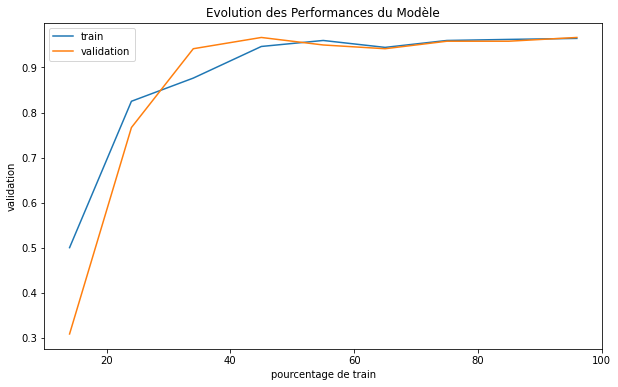

In [43]:
plt.figure(figsize=(10, 6))
# Afficher le nombre de points en fonction de la moyenne de valeurs de train score
plt.plot(N, train_score.mean(axis=1), label="train")
# Afficher le nombre de points en fonction de la moyenne des valeurs de validation
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("pourcentage de train")
plt.ylabel("validation")
plt.title("Evolution des Performances du Modèle")
plt.legend()
plt.show()

## Data Pre-Processing
#### *Si vous ne maîtrisez pas cette étape, alors vous ne serez jamais un bon Data Scientist*. En effet, le Data Pre-Processing représente jusqu'à 80% du travail de tout Data Scientist afin de développer des modèles avec de très bonnes performances !
#### Il faut noter que les algos de ML apprennent à partir des données qui leur sont fournies. Alors il faut se rassurer que ces données soient de bonnes qualité (elles ne sont pas eronnées, incomplètes, ni redondantes) sinon, le modèle ne sera pas non plus optimal et donc pas robuste. Pour ce faire, il faut nettoyer, filtrer, et normaliser ces données. 
#### Etapes de Pre-Processing :
1. **Encondage :** Convertir les données qualitatives (sous forme de mots) en valeurs numériques.
2. **Normalisation :** Elle consiste à mettre sur une même échelle toutes les données quantitatives.
3. **Imputation :** Permettant de remplacer les données manquantes par certaines valeurs statistiques.
4. **Sélection de variable :** Utilisant les test de statistique pour sélectionner les variables les plus utiles au développement du modèle.
5. **Extraction de Caractéristiques :** Elle consiste à générer de nouvelles variables à partir d'informations cachée dans le Dataset.
#### Modules Scikit-Learn pour cette tâche : 
- **sklearn.preprocessing (étapes 1 - 2)**
- **sklearn.impute (étape 3)**
- **sklearn.feature_selection (étape 4)**
- **sklearn.feature_extraction (étape 5)**

## 1. Encodage :
#### *Convertir les données qualitatives en données quantitatives (décimales numériques)*
## sklearn.preprocessing
#### TRANSFORMERS

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Instancier l'objet de la classe LabelEncoder
transformer = LabelEncoder()

In [46]:
# Données avec Numpy
X = np.array(["Chien", 
              "Chat", 
              "Chien", 
              "Oiseau", 
              "Chenille"])

In [47]:
# Fonction de transformation en analysant les données de Train_set
transformer.fit(X)

LabelEncoder()

In [48]:
# Application de la fonction sur toutes les données qui lui sont fournies
transformer.transform(X)

array([2, 0, 2, 3, 1])

In [49]:
# Mais les deux opérations dessus peuvent être faites toutes les deux en même temps
transformer.fit_transform(X)

array([2, 0, 2, 3, 1], dtype=int64)

### En combinant transformer et estimator on obtient une pipeline (chaîne de transformation)

### Encodage Ordinal :
#### LabelEncoder
##### Cet encodeur ne permet de traiter qu'une seule colonne (un seul encodeur)

In [50]:
y = np.array(["chien", "chat", "lapin", "oiseau", "chien"])

In [51]:
# Créer l'objet de la classe LabelEncoder
encodeur = LabelEncoder()

# Entrainer l'encodeur sur la colonne y
encodeur.fit(y)

LabelEncoder()

In [52]:
# Classe de l'encodeur
encodeur.classes_

array(['chat', 'chien', 'lapin', 'oiseau'], dtype='<U6')

In [53]:
# Transformer les données en données numériques
encodeur.transform(y)

array([1, 0, 2, 3, 1])

In [54]:
# Il arrive parfois que l'on veule retrouver les données d'origine afin de savoir dans nos 
# prédictions les correspondances exactes car on ne pourra pas deviner avec des valeurs 0,1,2...
# de quel animal s'agit-il par exemple donc il faut retrouver les données d'avant transformation
# Pour cela on doit décoder nos données en appliquant la transformation inverse (inverse_transform)
encodeur.inverse_transform(np.array([0, 1, 3, 2, 0]))

array(['chat', 'chien', 'oiseau', 'lapin', 'chat'], dtype='<U6')

#### Ordinal Encoder
##### Applicable sur plusieurs données, nottament les données de X

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
X = np.array([["chien", "poils"],
             ["lapin", "poils"],
             ["oiseau", "plumes"],
             ["chat", "poils"]])

In [57]:
# Objet de la classe OrdinalEncoder
encoder = OrdinalEncoder()

# Développer(entrainer) et transformer les données de façon simultanée
encoder.fit_transform(X)

array([[1., 1.],
       [2., 1.],
       [3., 0.],
       [0., 1.]])

### Encodage One-Hot :
#### LabelBinarizer
#### Etant donné que les deux 1ers enodeurs donnent des données numériques sans étiqueter et d'un point de vue aritmétique cela fera la comparaison entre les valeurs numériques et cela risque fortement de penaliser quelques modèles(sensibles aux relations d'ordre) de ML sauf ceux basés sur les arbres de décision.

In [58]:
from sklearn.preprocessing import LabelBinarizer

In [59]:
encoder = LabelBinarizer()

# Entrainer et transformer le model
encoder.fit_transform(y)

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [60]:
# On peut voir que les données sont toutes binaires et on peut ignorer les valeurs 0
# en compressant la cette matrice avec la méthode de Compressed Sparse Row(CSR)
encodeur = LabelBinarizer(sparse_output=True)
encodeur.fit_transform(y)

<5x4 sparse matrix of type '<class 'numpy.int32'>'
	with 5 stored elements in Compressed Sparse Row format>

#### One-Hot Encoder
#### Avec cet encodeur, la compression se fait par défaut pour éviter que l'on se retrouve avec une matrice très large et difficile à manipuler

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
# Par défaut, la méthode CSV est à True(appliquée)
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## 2. Normalisation : 
#### *Mettre sur une même et seule échelle toutes les données quantitatives (numériques ou décimales)*
### - Normalisation MinMax
#### *Elle consiste à transformer chaque variable de telle sorte que ses valeurs soient toutes comprises entre 0 et 1 => Xscaled = (X - Xmin / Xmax - Xmin)*

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
X = np.array([[90], [100], [130]])

In [65]:
# Créer un scaler(Instancier l'objet de la classe MinMaxScaler)
scaler = MinMaxScaler()

# Développer le modèle puis le transformer sur les données X
scaler.fit_transform(X)

array([[0.  ],
       [0.25],
       [1.  ]])

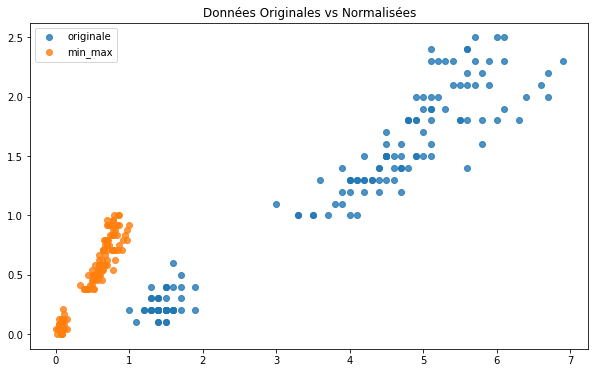

In [66]:
# Pour bien comprendre la normalisation, on va travailler avec le Dataset des fleurs d'iris
# Chargé précedemment
X = iris.data # Données (labels)

# Normaliser les données
X_min_max = MinMaxScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
# Visualiser les 2 dernières variables avant la normalisation
plt.scatter(X[:, 2], X[:, 3], label="originale", alpha=0.8)
# Visualiser les 2 dernières variables après la normalisation
plt.scatter(X_min_max[:, 2], X_min_max[:, 3], label="min_max", alpha=0.8)
plt.title("Données Originales vs Normalisées")
plt.legend()
plt.show()

### - Normalisation Standard
#### *Elle transforme les données de telle sorte à ce que chaque variable aie une moyenne nulle(0) et l'écart-type égal à 1 => Xscaled = (X - Xmean / Xstd)* Et ceci est beaucoup plus utiliser dans les modèles statistiques (SVM ou Principal Component Analysis)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X = np.array([[90], [100], [130]])

In [69]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.98058068],
       [-0.39223227],
       [ 1.37281295]])

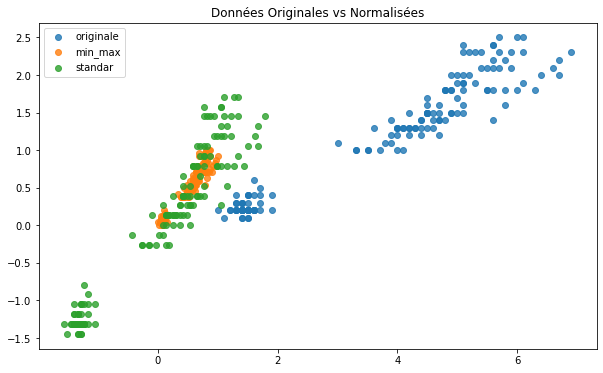

In [70]:
# Comparaison avec la technique MinMax
X = iris.data # Données (labels)

# Normalisation avec MinMaxScaler()
X_min_max = MinMaxScaler().fit_transform(X)

# Normalisation avec StandarScaler()
X_std_scaler = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
# Visualiser les 2 dernières variables avant la normalisation
plt.scatter(X[:, 2], X[:, 3], label="originale", alpha=0.8)
# Visualiser les données normalisées avec MinMax
plt.scatter(X_min_max[:, 2], X_min_max[:, 3], label="min_max", alpha=0.8)
# Visualiser les données normalisées avec Standard
plt.scatter(X_std_scaler[:, 2], X_std_scaler[:, 3], label="standar", alpha=0.8)
plt.title("Données Originales vs Normalisées")
plt.legend()
plt.show()

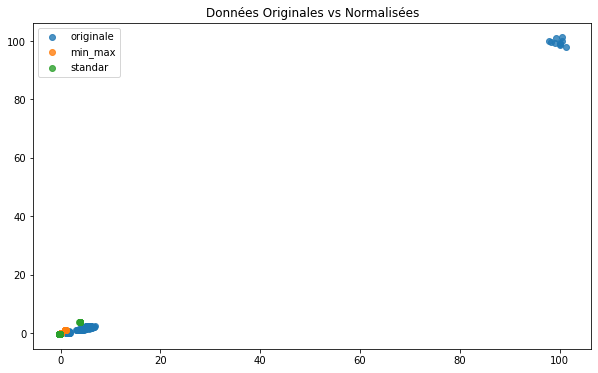

In [71]:
# Ces deux techniques de normalisation ont un grand incovenient sur les valeurs abérantes(outliers)
# Voyons cela en visuel pour en apprendre davantage

X = iris.data # Données (labels)

# Valeurs abérantes
outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
# Assembler les outliers avec les données originales
X = np.vstack((X, outliers))

# Normalisation avec MinMaxScaler()
X_min_max = MinMaxScaler().fit_transform(X)
# Normalisation avec StandarScaler()
X_std_scaler = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
# Visualiser les 2 dernières variables des outliers
plt.scatter(X[:, 2], X[:, 3], label="originale", alpha=0.8)
plt.scatter(X_min_max[:, 2], X_min_max[:, 3], label="min_max", alpha=0.8)
plt.scatter(X_std_scaler[:, 2], X_std_scaler[:, 3], label="standar", alpha=0.8)
plt.title("Données Originales vs Normalisées")
plt.legend()
plt.show()

#### Pour palier à ce problème des outliers, vaut mieux éviter les techniques MinMaxScaler et StandardScaler et utiliser les techniques peu sensibles aux outliers comme le cas de ci-dessous

### - Normalisation RobustScaler
#### *Cette tehnique transforme chaque variable X en étant peu sensible aux outliers* => Xscaled = (X -  mediane ) / IQR  --- =>>> InterQuartile(écart entre Q1 le 1ere quartile et Q3 le 3ème quartile)

In [72]:
from sklearn.preprocessing import RobustScaler

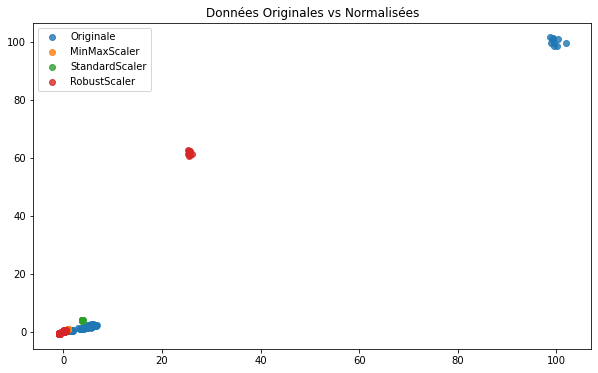

In [73]:

X = iris.data # Données (labels)

# Valeurs abérantes
outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
# Assembler les outliers avec les données originales
X = np.vstack((X, outliers))

# Normalisation avec MinMaxScaler()
X_min_max = MinMaxScaler().fit_transform(X)
# Normalisation avec StandarScaler()
X_std_scal = StandardScaler().fit_transform(X)
# Normalisation avec RobustScaler()
X_rob_scal = RobustScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
# Visualiser les 2 dernières variables avant les techniques de normalisation
plt.scatter(X[:, 2], X[:, 3], label="Originale", alpha=0.8)
plt.scatter(X_min_max[:, 2], X_min_max[:, 3], label="MinMaxScaler", alpha=0.8)
plt.scatter(X_std_scal[:, 2], X_std_scal[:, 3], label="StandardScaler", alpha=0.8)
plt.scatter(X_rob_scal[:, 2], X_rob_scal[:, 3], label="RobustScaler", alpha=0.8)
plt.title("Données Originales vs Normalisées")
plt.legend()
plt.show()

#### NB : *Dans l'implémentation du Natural Language Processing(NLP) il serait mieux de normaliser les données avec la technique de Normalizer() qui ne transforme que les lignes et non les colonnes*

## PolynomialFeatures
#### *Créer des variables polynomiales à partir des variables existentes.* => c'est faire du Feature Engineering et cela permet de développer des modèle de ML plus riches et plus sophestiqués

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
X = np.array([[1], [3], [0.5]])

In [76]:
# Développer un modèle polynomial de degré 3
PolynomialFeatures(3).fit_transform(X)

array([[ 1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  0.5  ,  0.25 ,  0.125]])

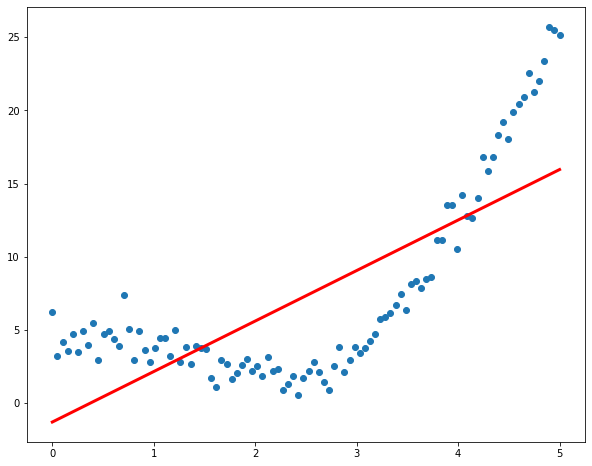

In [77]:
# Un tableau Numpy de 100 éléments compris entre 0 et 5
X = np.linspace(0, 5, 100).reshape((100, 1))
y = X**2 + 5 * np.cos(X) + np.random.randn(100, 1)

plt.figure(figsize=(10, 8))
# Afficher X en fonction de y
plt.scatter(X, y)

# Créer un modèle Linéaire et l'entraîner sur les données X et y
model = LinearRegression().fit(X, y)
# Faire directement des prédictions sans pour autant l'entraîner 
y_pred = model.predict(X)

# Afficher X en fonction des données prédictes
plt.plot(X, y_pred, c="r", lw=3)
plt.show()

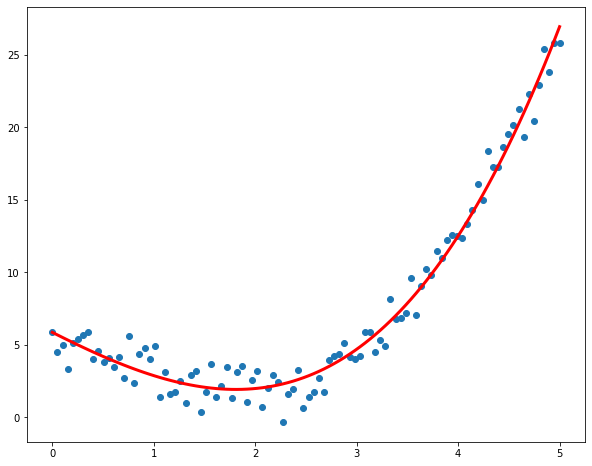

In [78]:
# D'après le visuel ci-dessus on peut vraiment voir que le modèle choisi ne rentre dans nos données
# Donc il faut à tout changer le modèle pour résoudre ce problème
# Un tableau Numpy de 100 éléments compris entre 0 et 5
X = np.linspace(0, 5, 100).reshape((100, 1))
y = X**2 + 5* np.cos(X) + np.random.randn(100, 1)

plt.figure(figsize=(10, 8))
# Afficher X en fonction de y
plt.scatter(X, y)

# Créer une variable polynomial de degré 3
X_poly = PolynomialFeatures(3).fit_transform(X)

# Créer un modèle linéaire et l'entraîner sur les données X et y
model = LinearRegression().fit(X_poly, y)
# Faire des prédictions sur la variable polynomiale
y_pred = model.predict(X_poly)

# Afficher X en fonction des données prédictes
plt.plot(X, y_pred, c="r", lw=3)
plt.show()

In [79]:
from sklearn.preprocessing import PowerTransformer

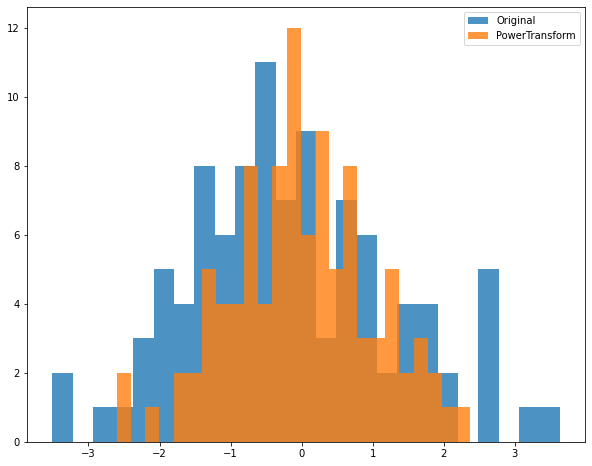

In [80]:
np.random.seed(0)
X = np.random.randn(100, 2) + np.random.randn(100, 2)

# Développer le modèle puis l'entrainer sur les données X en les tranformant
X1 = PowerTransformer().fit_transform(X)

plt.figure(figsize=(10, 8))
# Afficher les données de la 1ère ligne sous forme d'histogramme
plt.hist(X[:, 0], bins=25, alpha=0.8, label="Original")
# Afficher les données de PowerTransformer
plt.hist(X1[:, 0], bins=25, alpha=0.8, label="PowerTransform")
plt.legend()
plt.show()

### Discrétisatioon
#### *C'est une opération qui permet de découper une variable continue en plusieurs parties*. Elle est très utile pour la création de différentes catégorie dans une variable.

In [81]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [82]:
# Matrice de 10 éléments entre 0 et 5 de taille 10
X = np.linspace(0, 5, 10).reshape(10, 1)
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [83]:
# Définir un seuil égal à 3 pour que tout ce qui est inférieur à 3 soit converti en 0 
# Et tout ce qui est supérieur ou égal à 3 soit converti en 1
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [84]:
# Ce tranformer permet de découper notre variable en plus que deux catégories différentes
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Personalisation

In [85]:
from sklearn.preprocessing import FunctionTransformer

In [86]:
X = np.linspace(1, 5, 10).reshape((-1, 1))

In [87]:
# Définir l'instance de la classe FunctionTransformer comme modèle
mon_transformeur = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)

In [88]:
# Entraîner le modèle pour avoir une fonction de transformation
mon_transformeur.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

### Application

In [89]:
from sklearn.linear_model import SGDClassifier

In [90]:
# Travailler sur le Dataset des fleurs d'iris
X = iris.data # les données
y = iris.target # Les cibles 

# Diviser le Dataset en deux parties : la partie train_set et test_set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
# Création du Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Création de l'Estimator
model = SGDClassifier(random_state=0)
# Entraînement du modèle basé sur les données de train et transformées
model.fit(X_train_transformed, y_train)

# Le Test du modèel
X_test_transformed = scaler.transform(X_test)
# Faire des prédictions sur les données du test
model.predict(X_test_transformed)

array([1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2])

## Pipeline
### Avantages : 
1. *Simple à utiliser*
2. *Evite d'avoir les fuites de données ou des données mal transformées*
3. *Permet de faire des opérations de cross-validation sur l'ensemble de la chaîne de transformation*

In [92]:
from sklearn.pipeline import make_pipeline

In [93]:
# Créer un modèle
model = make_pipeline(StandardScaler(), SGDClassifier())

# Entraîner le modèle
model.fit(X_train, y_train)
# Faire des prédictions sur le modèle
model.predict(X_test)

# Nous avons les mêmes résultats bien plus rapides que ci-dessus

array([1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2])

In [94]:
# Créer une pipeline
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))

# Observer la pipeline
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [95]:
# Création des paramètres
params = {
    "polynomialfeatures__degree": [3, 4, 5],
    "sgdclassifier__penalty": ["l1", "l2"]
}

# Création de le grid de recherche
grid = GridSearchCV(model, param_grid=params, cv=5)

# Entrainer le grid
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [96]:
# Voir les meilleurs params
grid.best_params_

{'polynomialfeatures__degree': 5, 'sgdclassifier__penalty': 'l1'}

In [97]:
# Evaluer le modèle avec les données 
grid.score(X_test, y_test)

1.0

### Exercice : 
Recréer la pipeline pour voir quels transformer donnent les meilleurs résultats

# 3. Imputation 
##### Remplacer les données manquantes par certaines valeurs statistiques.

### - SimpleImputer : 
*Remplace toutes les valeurs manquantes par une valeur statistique*

In [133]:
from sklearn.impute import SimpleImputer

In [134]:
# Création d'un tableau Numpy
X = np.array([[10, 3],
             [1, 3],
             [7, 4],
             [np.nan, 3]])

In [135]:
# Pour utiliser ce transformer, il faut d'abord indiquer les valeurs manquantes (missing_values) 
# ensuite la stratégie(strategy(mean, median, most_frequent, constant)) et en fin la valeur
# à remplacer (fill_value(pour constant))
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Développement
imputer.fit_transform(X)

array([[10.,  3.],
       [ 1.,  3.],
       [ 7.,  4.],
       [ 6.,  3.]])

In [137]:
# Les données de test, il est important de séparer le train avec le test
# En effet, les données du train seront utilisées pour entrainer le modèle et celles du test
# serviront pour le test afin que le modèle n'ai pas pas l'impréssion de d'avoir déjà vu ces
# données et ce qui donnera un mauvais modèle et pour ensuite, des mauvaises prédictions
X_test = np.array([[9, 5],
                  [43, 7],
                  [11, 11],
                  [np.nan, np.nan]])

# La transformation
imputer.transform(X_test)

array([[ 9.  ,  5.  ],
       [43.  ,  7.  ],
       [11.  , 11.  ],
       [ 6.  ,  3.25]])

### - KNNImputer :
*Remplace toutes les valeurs manquantes associées à un certain échantillon par les valeurs des plus proches voisins.*

In [138]:
from sklearn.impute import KNNImputer

In [141]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

In [142]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[  1. , 100. ],
       [  2. ,  30. ],
       [  3. ,  15. ],
       [  2.5,  20. ]])

### - MissingIndicator :
*Son but est de montrer à quel endroit il nous manque des données dans le Dataset*

In [143]:
from sklearn.impute import MissingIndicator

In [146]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

missing_values = MissingIndicator()

missing_values.fit_transform(X)

In [148]:
# Création d'une pipeline afin de créer des colonnes en paralèles
from sklearn.pipeline import make_union

In [149]:
# Une pipeline avec un SimpleImputer remplaçant les données manquantes par -99 
# en paralèle avec un MissingIndicator
pipeline = make_union(SimpleImputer(strategy="constant", fill_value=-99),
                     MissingIndicator())

# Traitement des données
pipeline.fit_transform(X)

array([[  1., 100.,   0.],
       [  2.,  30.,   0.],
       [  3.,  15.,   0.],
       [-99.,  20.,   1.]])

#### ASTUCE DE DATA SCIENTIST :
*Il faut toujours essayer de voir si le manque d'informations peut représenter une nouvelle information pour le modèle*

# APPLICATION
### Travailler sur le Dataset du Titanic

In [150]:
import seaborn as sns

In [158]:
# Charger le Dataset du titanic
titanic = sns.load_dataset("titanic")

# Création des données
X = titanic[["pclass", "age"]]
y = titanic["survived"]

# Diviser les données en deux parties : le train et le set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [159]:
# Créer une pipeline
model = make_pipeline(KNNImputer(), SGDClassifier(random_state=0))

In [160]:
# Pour l'optimisation des caractéristiques de GridSearch, on crée des paramètres
params = {
    "knnimputer__n_neighbors" : [1, 2, 3, 4, 5],
    "sgdclassifier__penalty": ["l1", "l2"]
    
}

In [162]:
# Une grid contenant le modèle, le dictionnaire de params et le nbre de cv
grid = GridSearchCV(model, param_grid=params, cv=5)

# Entrainer le grid sur les données de train
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4, 5],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [165]:
# Observation des meilleurs paramètres
grid.best_params_

{'knnimputer__n_neighbors': 1, 'sgdclassifier__penalty': 'l1'}

# 4. Sélection de variables
### feature_selection :
##### Trouver les variales les plus utiles pour le développement du modèle de Machine Learning

### - VarianceThreshold
#### Calcul la variance de toutes les variables du Dataset puis éliminer toutes les variables dont la variance est inférieure est au seuil défint au préalable. Eliminer les variables qui varient peu ou pas du tout.

In [98]:
from sklearn.feature_selection import VarianceThreshold

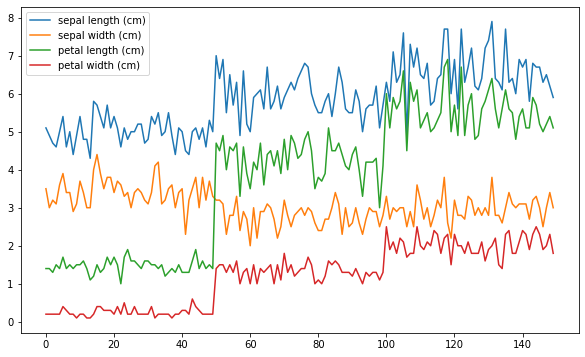

In [102]:
# Travailler sur les données des fleurs d'iris chargées ci-dessus
plt.figure(figsize=(10, 6))
# Visualiser les différentes variables (iris.data)
plt.plot(X)
plt.legend(iris.feature_names)
plt.show()

In [104]:
# On peut voir comment le sepal width(orange) ne varie presque pas donc il serait mieux de l'éliminer

# Calculer la variance de toutes les variables afin de définir un seuil d'élimination
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [106]:
# Créer un object selecteur à partir de la classe VarianceTreshold tout 
# en précisant un seuil afin d'éliminer les variables qui ne varient pas ou presque pas
selector = VarianceThreshold(threshold=0.2)

# Transformation 
selector.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [107]:
# Voir les variables qui ont été sélectionnées
selector.get_support()

array([ True, False,  True,  True])

In [108]:
# Avec la liste des differentes fleurs on peut faire du Booleane Indexing
# Mettre cette liste dans un tableau Numpy
liste_fleurs = np.array(iris.feature_names)

In [112]:
# Voir les variables sélectionnées après définition du seuil
liste_fleurs[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### - SelectKBest
#### On sélectionne les variables en se basant sur les tests de dépendance : *sélectionne les K variables X dont le score du test de dépendance avec y est le plus élevé.*  TESTS (classification : chi2 - pour comparer les variables catégorielles ensemble, ANOVA; Régression : Pearson Correlation)

In [113]:
from sklearn.feature_selection import SelectKBest, chi2

In [114]:
# Utilisation du test de chi2
chi2(X, y)

# On a 2 tableaux, le 1er pour les scores du test (score statistique) 
# et le 2nd pour les pvalues, valeur-p du test (les valeurs de proba)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [116]:
# Créer un sélecteur du transformeur SelectKBest avec le nombre de variables de X
# Tout en précisant le type de test de dépendance à mettre en place
selector = SelectKBest(chi2, k=2)

# On applique la transformation sur les données X en fonction de y
selector.fit_transform(X, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [117]:
# Voir les variables qui ont été sélectionnées
selector.get_support()

array([False, False,  True,  True])

### - SelectFromModel :
#### *Cette technique consiste à pré-entraîner un estimateur sur tout le Dataset puis examiner ses coéfficients pour voir quelles sont les variables (features) les plus importantes*

In [118]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [119]:
# Créer un transformeur en utilisant l'estimateur SGDClassifier() avec un sueil de base à la moyenne
selector = SelectFromModel(SGDClassifier(random_state=0), threshold="mean")

# Développer le transformeur sur X et y car, avec l'estimateur il est obligatoire de l'entraîner
selector.fit_transform(X, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [120]:
# On obtient le même résultat que ci-dessus dont 2 variables ont été sélectionnées

# Afficher ces 2 variables sélectionnées
selector.get_support()

array([False, False,  True,  True])

In [125]:
# Voir les coéfficients qui ont été trouvés par notre estimator(SGDClassifier)
selector.estimator_.coef_.mean(axis=0)

# Tout ce qui est négatif n'est pas sélectionné mais plutôt tout ce qui est positif(au dessus de la moyenne)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

### - RFE(Recursiv Feature Elimination) + RFECV(Recursiv Feature Elimination Cross-Validation) : *Selecteurs récursifs* éliminent les variables les moins importantes de façon récursive.
#### Un estimateur est entrainé plusieurs fois, après chaque entrainement, des features(variables) sont éliminées sur la base des coéfficientes les plus faibles de l'estimateur

In [126]:
from sklearn.feature_selection import RFE, RFECV

In [128]:
# step(nombre de variables à éliminer à chaque itération)
# min_features_to_select(nbre de variables que l'on désir à la fin de l'itération récursive)
# cv(désigne le nbre de split pour notre cross-validation)
selector = RFECV(SGDClassifier(random_state=0), 
                 step=1, 
                 min_features_to_select=2, 
                 cv=5)

# Entrainer le sélector puis le tranformer
selector.fit_transform(X, y)

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [129]:
# Voir le classement final de nos différentes variables
selector.ranking_

array([2, 1, 1, 1])

In [131]:
# Voir le score à chaque itération
selector.grid_scores_

array([[0.73333333, 0.93333333, 0.86666667, 0.83333333, 0.63333333],
       [0.73333333, 0.8       , 0.9       , 0.83333333, 0.96666667],
       [1.        , 0.8       , 0.76666667, 0.63333333, 0.66666667]])